# The case study deals with our client (Manufacturer A) who is leading Food and Beverage customer.Client wants to understand the growth patterns of consumer preferences (themes) and evaluate positioning "of their brand across different themes. Client also wants to know the sales drivers of their products. 

In [1]:
import os

import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
import scipy.stats as stats
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error,mean_absolute_percentage_error
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

#from pandas_profiling import ProfileReport
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
df1 = pd.read_csv("google_search_data.csv")
df2 = pd.read_csv("product_manufacturer_list.csv")
df3 = pd.read_csv("sales_data.csv")
df4 = pd.read_csv("social_media_data.csv")
df5 = pd.read_csv("Theme_list.csv")
df6= pd.read_csv("Theme_product_list.csv")

# The data imported from different dataset is proceeded further for analysis.We can perform EDA to understand certain anamolies,sufficiency and use the same analysis in answering the bussiness question.


# Data Preparation 

# The list of themes available across all data sources

In [3]:
df1.columns = df1.columns.str.lower()

In [4]:
df1

,date,platform,searchvolume,claim_id,week_number,year_new
0,05-01-2014,google,349,916,1,2014
1,06-01-2014,google,349,916,2,2014
2,07-01-2014,google,697,916,2,2014
3,10-01-2014,google,349,916,2,2014
4,20-01-2014,google,697,916,4,2014
...,...,...,...,...,...,...
181560,05-09-2019,walmart,125,980,36,2019
181561,22-09-2019,walmart,84,980,38,2019
181562,26-09-2019,walmart,42,980,39,2019
181563,15-07-2019,walmart,42,622,29,2019


In [5]:
df2.columns = df2.columns.str.lower()

In [6]:
df2

,product_id,vendor,unnamed: 2,unnamed: 3,unnamed: 4,unnamed: 5,unnamed: 6
0,1,Others,NaN,NaN,NaN,NaN,NaN
1,2,Others,NaN,NaN,NaN,NaN,NaN
2,3,Others,NaN,NaN,NaN,NaN,NaN
3,4,Others,NaN,NaN,NaN,NaN,NaN
4,5,Others,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
67170,67171,Private Label,NaN,NaN,NaN,NaN,NaN
67171,67172,Private Label,NaN,NaN,NaN,NaN,NaN
67172,67173,Private Label,NaN,NaN,NaN,NaN,NaN
67173,67174,Private Label,NaN,NaN,NaN,NaN,NaN


In [7]:
df3.columns = df3.columns.str.lower()

In [8]:
df3

,system_calendar_key_n,product_id,sales_dollars_value,sales_units_value,sales_lbs_value
0,20160109,1,13927.0,934,18680
1,20160109,3,10289.0,1592,28646
2,20160109,4,357.0,22,440
3,20160109,6,23113.0,2027,81088
4,20160109,7,23177.0,3231,58164
...,...,...,...,...,...
4526177,20181027,47536,8.0,2,3
4526178,20181027,47539,391.0,39,68
4526179,20181027,47543,105.0,59,48
4526180,20181027,47544,3720.0,1246,4361


In [9]:
df4.columns = df4.columns.str.lower()

In [10]:
df4

,theme id,published_date,total_post
0,148.0,10-01-2015,76
1,148.0,10-10-2015,31
2,148.0,10-11-2015,65
3,148.0,10-12-2015,88
4,148.0,10/13/2015,85
...,...,...,...
533385,876.0,09-05-2019,4658
533386,876.0,09-06-2019,3731
533387,876.0,09-07-2019,2336
533388,876.0,09-08-2019,1374


In [11]:
df5.columns = df5.columns.str.lower()

In [12]:
df5

,claim_id,claim name
0,0,No Claim
1,8,low carb
2,15,beans
3,16,cocoa
4,26,vanilla
...,...,...
203,508,cola
204,769,shortbread
205,949,passion fruit
206,521,blood orange


In [13]:
df6.columns = df6.columns.str.lower()

In [14]:
df6

,product_id,claim_id
0,26,8
1,29,8
2,48,81
3,50,81
4,74,227
...,...,...
91480,8158,0
91481,45183,0
91482,25690,0
91483,46085,0


In [15]:
df1.duplicated().sum()

40

In [16]:
df2.duplicated().sum()

0

In [17]:
df3.duplicated().sum()

0

In [18]:
df4.duplicated().sum()

26299

In [19]:
df5.duplicated().sum()

0

In [20]:
df6.duplicated().sum()

0

In [21]:
# set1 = set()
# for i in df5['Claim Name']:
#     set1.add(i)
# print(set1)
df5['claim name'].unique()

array(['No Claim', 'low carb', 'beans', 'cocoa', 'vanilla', 'stroganoff',
       'cumin', 'high/source of protein', 'no additives/preservatives',
       'buckwheat', 'tutti frutti', 'ethical - not specific', 'brown ale',
       'french bisque', 'pheasant', 'whitebait', 'gmo free',
       'low calorie', 'peach', 'crab', 'nuts', 'venison', 'fruit',
       'convenience - easy-to-prepare', 'anchovy', 'pomegranate',
       'scallop', 'american gumbo', 'tuna', 'low sodium', 'low sugar',
       'french', 'chicken', 'ethical - packaging', 'cherry',
       'vitamin/mineral fortified', 'liver', 'red raspberry', 'cookie',
       'pollock', 'blueberry', 'bone health', 'prebiotic', 'poultry',
       'cheddar cheese', 'energy/alertness', 'halal', 'herbs', 'pizza',
       'american southwest style', 'salmon', 'beef hamburger', 'tilapia',
       'mackerel', 'peanut', 'lobster', 'sea salt', 'soy foods',
       'apple cinnamon', 'gingerbread', 'vegetarian', 'ethnic & exotic',
       'cream', 'berry', 'g

In [22]:
df5.groupby('claim_id')['claim name'].count()

claim_id
0      1
8      1
15     1
16     1
26     1
      ..
982    1
983    1
984    1
985    1
999    1
Name: claim name, Length: 208, dtype: int64

# Consumer preference(themes) available in each data source

In [23]:
df10=pd.merge(df1,df5,left_on='claim_id',right_on='claim_id',how='inner',)

In [24]:
df10

,date,platform,searchvolume,claim_id,week_number,year_new,claim name
0,05-01-2014,google,349,916,1,2014,gluten free
1,06-01-2014,google,349,916,2,2014,gluten free
2,07-01-2014,google,697,916,2,2014,gluten free
3,10-01-2014,google,349,916,2,2014,gluten free
4,20-01-2014,google,697,916,4,2014,gluten free
...,...,...,...,...,...,...,...
181560,24-07-2019,google,42,843,30,2019,snickerdoodle
181561,25-09-2019,google,84,843,39,2019,snickerdoodle
181562,04-06-2018,amazon,135,606,23,2018,hemp seeds
181563,31-01-2019,amazon,39,433,5,2019,gingerbread


In [25]:
#df10['platform'] = df10['platform'].ffill(axis = 0)

In [26]:
df10.isnull().sum()

date            0
platform        0
searchvolume    0
claim_id        0
week_number     0
year_new        0
claim name      0
dtype: int64

In [27]:
consumer1 = df10.groupby(['claim name']).count()['searchvolume'].sort_values(ascending = False)[:10]

<AxesSubplot:ylabel='searchvolume'>

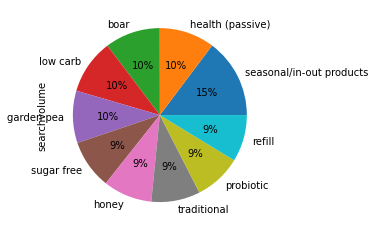

In [28]:
consumer1.plot(kind ='pie',y='value_column',autopct='%1.0f%%')

In [29]:
len(df10['claim name'].unique())

160

In [30]:
df10.isnull().sum()

date            0
platform        0
searchvolume    0
claim_id        0
week_number     0
year_new        0
claim name      0
dtype: int64

In [31]:
make1 = dict(zip(df6['product_id'],df6['claim_id']))

In [32]:
new_data_frame = df3[:]

In [33]:
new_data_frame['claim_id'] = new_data_frame['product_id'].map(make1)

C:\Users\ATUL~1.GUP\AppData\Local\Temp/ipykernel_13204/344693323.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data_frame['claim_id'] = new_data_frame['product_id'].map(make1)


In [34]:
make2 = dict(zip(df5['claim_id'],df5['claim name']))

In [35]:
new_data_frame['claim name'] = new_data_frame['claim_id'].map(make2)

C:\Users\ATUL~1.GUP\AppData\Local\Temp/ipykernel_13204/3117817003.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data_frame['claim name'] = new_data_frame['claim_id'].map(make2)


In [36]:
len(new_data_frame['claim name'].unique())

45

<bound method Axes.hist of <AxesSubplot:>>

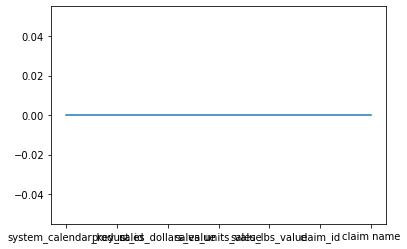

In [37]:
new_data_frame.isnull().sum().plot().hist

In [38]:
consumer2 = new_data_frame.groupby(['claim name']).count()['sales_dollars_value'].sort_values(ascending = False)[:10]

<AxesSubplot:ylabel='sales_dollars_value'>

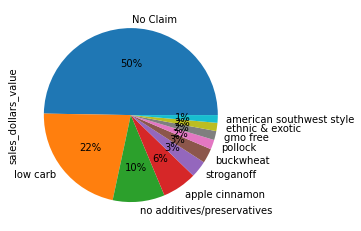

In [39]:
consumer2.plot(kind ='pie',y='value_column',autopct='%1.0f%%')

In [40]:
frame1 = dict(zip(df1['date'],df1['claim_id']))

In [41]:
frame2 = dict(zip(df5['claim_id'],df5['claim name']))

In [42]:
social_frame = df4[:]

In [43]:
social_frame

,theme id,published_date,total_post
0,148.0,10-01-2015,76
1,148.0,10-10-2015,31
2,148.0,10-11-2015,65
3,148.0,10-12-2015,88
4,148.0,10/13/2015,85
...,...,...,...
533385,876.0,09-05-2019,4658
533386,876.0,09-06-2019,3731
533387,876.0,09-07-2019,2336
533388,876.0,09-08-2019,1374


In [44]:
social_frame['claim_id'] = social_frame['published_date'].map(frame1)

C:\Users\ATUL~1.GUP\AppData\Local\Temp/ipykernel_13204/2486316884.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  social_frame['claim_id'] = social_frame['published_date'].map(frame1)


In [45]:
social_frame['claim name'] = social_frame['claim_id'].map(frame2)

C:\Users\ATUL~1.GUP\AppData\Local\Temp/ipykernel_13204/66559384.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  social_frame['claim name'] = social_frame['claim_id'].map(frame2)


In [46]:
social_frame

,theme id,published_date,total_post,claim_id,claim name
0,148.0,10-01-2015,76,536.0,mango
1,148.0,10-10-2015,31,536.0,mango
2,148.0,10-11-2015,65,536.0,mango
3,148.0,10-12-2015,88,536.0,mango
4,148.0,10/13/2015,85,NaN,NaN
...,...,...,...,...,...
533385,876.0,09-05-2019,4658,980.0,honey
533386,876.0,09-06-2019,3731,622.0,cheese
533387,876.0,09-07-2019,2336,8.0,low carb
533388,876.0,09-08-2019,1374,929.0,sausage


In [47]:
consumer3 =social_frame.groupby(['claim name']).count()['total_post'].sort_values(ascending = False)[:10]

<AxesSubplot:ylabel='total_post'>

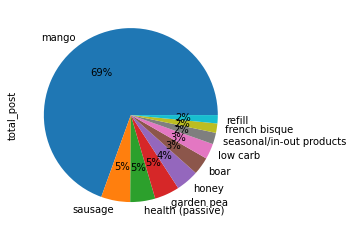

In [48]:
consumer3.plot(kind ='pie',y='value_column',autopct='%1.0f%%')

In [49]:
len(social_frame['claim name'].unique())

40

<bound method Axes.hist of <AxesSubplot:>>

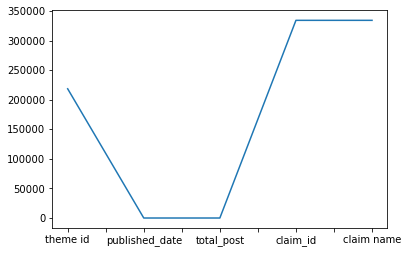

In [50]:
social_frame.isnull().sum().plot().hist

# The outliers,sparsity and other missing values are dealt in further analysis and can figure out how to deal with certain plot.

# Report for data sufficiency, sparsity and anomalies in each data source

In [51]:
df1.shape

(181565, 6)

In [52]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181565 entries, 0 to 181564
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   date          181565 non-null  object
 1   platform      181565 non-null  object
 2   searchvolume  181565 non-null  int64 
 3   claim_id      181565 non-null  int64 
 4   week_number   181565 non-null  int64 
 5   year_new      181565 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 8.3+ MB


In [53]:
df1.describe()

,searchvolume,claim_id,week_number,year_new
count,181565.000000,181565.000000,181565.000000,181565.000000
mean,5823.349318,629.557629,25.169823,2017.013196
std,11251.075181,284.426899,14.613668,1.655898
min,1.000000,8.000000,1.000000,2014.000000
25%,281.000000,516.000000,13.000000,2016.000000
50%,1173.000000,670.000000,25.000000,2017.000000
75%,5539.000000,901.000000,37.000000,2018.000000
max,370484.000000,999.000000,53.000000,2019.000000


In [54]:
df1.platform.value_counts()

google     138115
amazon      23828
chewy       13352
walmart      6270
Name: platform, dtype: int64

In [55]:
a = (df1.to_numpy() == 0).mean()

In [56]:
print(a)

0.0


<AxesSubplot:>

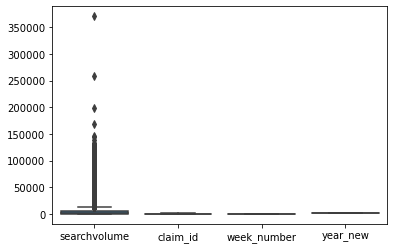

In [57]:
sns.boxplot(data=df1)

In [58]:
df2.shape

(67175, 7)

In [59]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67175 entries, 0 to 67174
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   product_id  67175 non-null  int64  
 1   vendor      67175 non-null  object 
 2   unnamed: 2  0 non-null      float64
 3   unnamed: 3  0 non-null      float64
 4   unnamed: 4  0 non-null      float64
 5   unnamed: 5  0 non-null      float64
 6   unnamed: 6  0 non-null      float64
dtypes: float64(5), int64(1), object(1)
memory usage: 3.6+ MB


In [60]:
df2.drop(['unnamed: 2', 'unnamed: 3','unnamed: 4', 'unnamed: 5','unnamed: 6' ], axis=1, inplace=True)

In [61]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67175 entries, 0 to 67174
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   product_id  67175 non-null  int64 
 1   vendor      67175 non-null  object
dtypes: int64(1), object(1)
memory usage: 1.0+ MB


In [62]:
df2.describe()

,product_id
count,67175.000000
mean,33588.000000
std,19391.896503
min,1.000000
25%,16794.500000
50%,33588.000000
75%,50381.500000
max,67175.000000


In [63]:
b = (df2.to_numpy() == 0).mean()
print(b)

0.0


<AxesSubplot:>

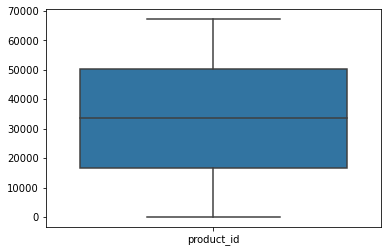

In [64]:
sns.boxplot(data=df2)

In [65]:
df3.shape

(4526182, 5)

In [66]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4526182 entries, 0 to 4526181
Data columns (total 5 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   system_calendar_key_n  int64  
 1   product_id             int64  
 2   sales_dollars_value    float64
 3   sales_units_value      int64  
 4   sales_lbs_value        int64  
dtypes: float64(1), int64(4)
memory usage: 172.7 MB


In [67]:
df3.describe()

,system_calendar_key_n,product_id,sales_dollars_value,sales_units_value,sales_lbs_value
count,4.526182e+06,4.526182e+06,4.526182e+06,4.526182e+06,4.526182e+06
mean,2.017505e+07,2.885857e+04,2.159454e+04,5.160053e+03,1.715339e+04
std,1.073537e+04,1.531254e+04,7.818057e+04,2.685341e+04,1.273401e+05
min,2.016011e+07,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00
25%,2.016123e+07,1.506900e+04,5.230000e+02,8.000000e+01,8.600000e+01
50%,2.017121e+07,2.998100e+04,2.655000e+03,4.030000e+02,6.110000e+02
75%,2.018110e+07,4.151300e+04,1.176500e+04,1.807000e+03,3.770000e+03
max,2.019100e+07,5.731700e+04,4.395964e+06,8.739980e+05,1.100310e+07


In [68]:
c = (df3.to_numpy() == 0).mean()
print(c)

0.0031541816038329878


<AxesSubplot:>

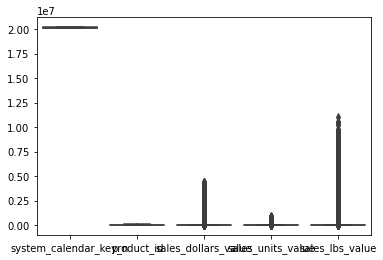

In [69]:
sns.boxplot(data = df3)

In [70]:
df4.shape

(533390, 3)

In [71]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 533390 entries, 0 to 533389
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   theme id        314879 non-null  float64
 1   published_date  533390 non-null  object 
 2   total_post      533390 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 12.2+ MB


In [72]:
df4.describe()

,theme id,total_post
count,314879.000000,533390.000000
mean,618.714049,1054.344890
std,290.145829,4459.377626
min,8.000000,0.000000
25%,440.000000,3.000000
50%,677.000000,35.000000
75%,870.000000,343.000000
max,999.000000,369528.000000


In [73]:
d = (df4.to_numpy() == 0).mean()
print(d)

0.05459669910072055


<AxesSubplot:>

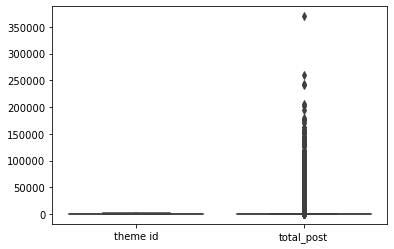

In [74]:
sns.boxplot(data = df4)

In [75]:
df5.shape

(208, 2)

In [76]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   claim_id    208 non-null    int64 
 1   claim name  208 non-null    object
dtypes: int64(1), object(1)
memory usage: 3.4+ KB


In [77]:
df5.describe()

,claim_id
count,208.000000
mean,585.379808
std,306.710307
min,0.000000
25%,272.250000
50%,633.000000
75%,861.750000
max,999.000000


In [78]:
e = (df5.to_numpy() == 0).mean()
print(e)

0.002403846153846154


<AxesSubplot:>

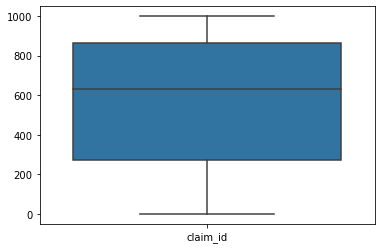

In [79]:
sns.boxplot(data = df5)

In [80]:
df6.shape

(91485, 2)

In [81]:
df6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91485 entries, 0 to 91484
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   product_id  91485 non-null  int64
 1   claim_id    91485 non-null  int64
dtypes: int64(2)
memory usage: 1.4 MB


In [82]:
df6.describe()

,product_id,claim_id
count,91485.000000,91485.000000
mean,26592.860983,86.830847
std,15793.924430,130.570486
min,1.000000,0.000000
25%,12908.000000,0.000000
50%,26074.000000,8.000000
75%,39238.000000,158.000000
max,57317.000000,438.000000


In [83]:
f = (df6.to_numpy() == 0).mean()
print(f)

0.1593266655735913


<AxesSubplot:>

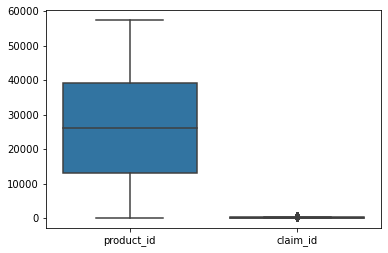

In [84]:
sns.boxplot(data = df6)

# Recommend the time granularity (Daily/Weekly/Monthly/Quarterly/Yearly) for the analysis

In [85]:
d14 = df1[df1['year_new']== 2014]
d15 = df1[df1['year_new']== 2015]
d16 = df1[df1['year_new']== 2016]
d17 = df1[df1['year_new']== 2017]
d18 = df1[df1['year_new']== 2018]
d19 = df1[df1['year_new']== 2019]

In [86]:
d14

,date,platform,searchvolume,claim_id,week_number,year_new
0,05-01-2014,google,349,916,1,2014
1,06-01-2014,google,349,916,2,2014
2,07-01-2014,google,697,916,2,2014
3,10-01-2014,google,349,916,2,2014
4,20-01-2014,google,697,916,4,2014
...,...,...,...,...,...,...
20614,24-12-2014,google,1122,536,52,2014
20615,25-12-2014,google,748,536,52,2014
20616,26-12-2014,google,1122,536,52,2014
20617,27-12-2014,google,1122,536,52,2014


In [87]:
d15

,date,platform,searchvolume,claim_id,week_number,year_new
424,29-12-2014,google,5341,8,1,2015
425,30-12-2014,google,5977,8,1,2015
426,31-12-2014,google,4197,8,1,2015
588,29-12-2014,google,271,39,1,2015
1144,29-12-2014,google,5755,747,1,2015
...,...,...,...,...,...,...
42041,22-12-2015,google,2617,536,52,2015
42042,23-12-2015,google,1496,536,52,2015
42043,24-12-2015,google,1122,536,52,2015
42044,25-12-2015,google,748,536,52,2015


In [88]:
d16

,date,platform,searchvolume,claim_id,week_number,year_new
20672,28-12-2015,google,697,916,53,2016
20673,29-12-2015,google,349,916,53,2016
21035,28-12-2015,google,7503,8,53,2016
21036,29-12-2015,google,6740,8,53,2016
21037,30-12-2015,google,8774,8,53,2016
...,...,...,...,...,...,...
64504,21-12-2016,google,2310,536,51,2016
64505,22-12-2016,google,2970,536,51,2016
64506,23-12-2016,google,6269,536,51,2016
64507,24-12-2016,google,2970,536,51,2016


In [89]:
d17

,date,platform,searchvolume,claim_id,week_number,year_new
42150,26-12-2016,google,4939,8,52,2017
42151,27-12-2016,google,9317,8,52,2017
42152,28-12-2016,google,7521,8,52,2017
42153,29-12-2016,google,5500,8,52,2017
42154,30-12-2016,google,5500,8,52,2017
...,...,...,...,...,...,...
91490,23-04-2017,google,11,981,16,2017
91491,28-05-2017,google,23,981,21,2017
91492,10-06-2017,google,26,981,23,2017
91493,27-07-2017,google,27,981,30,2017


In [90]:
d18

,date,platform,searchvolume,claim_id,week_number,year_new
91495,24-01-2018,google,523,785,4,2018
91496,03-03-2018,google,184,785,9,2018
91497,21-03-2018,google,184,785,12,2018
91498,03-04-2018,google,185,785,14,2018
91499,21-04-2018,google,185,785,16,2018
...,...,...,...,...,...,...
143013,23-03-2018,walmart,156,689,12,2018
143014,04-07-2018,walmart,35,689,27,2018
143015,11-07-2018,walmart,35,689,28,2018
143016,22-07-2018,walmart,35,120,29,2018


In [91]:
d19

,date,platform,searchvolume,claim_id,week_number,year_new
91947,31-12-2018,google,7716,8,1,2019
92269,31-12-2018,google,482,821,1,2019
92524,31-12-2018,google,929,543,1,2019
93116,31-12-2018,google,25326,747,1,2019
93479,31-12-2018,google,3495,922,1,2019
...,...,...,...,...,...,...
181560,05-09-2019,walmart,125,980,36,2019
181561,22-09-2019,walmart,84,980,38,2019
181562,26-09-2019,walmart,42,980,39,2019
181563,15-07-2019,walmart,42,622,29,2019


<AxesSubplot:xlabel='week_number'>

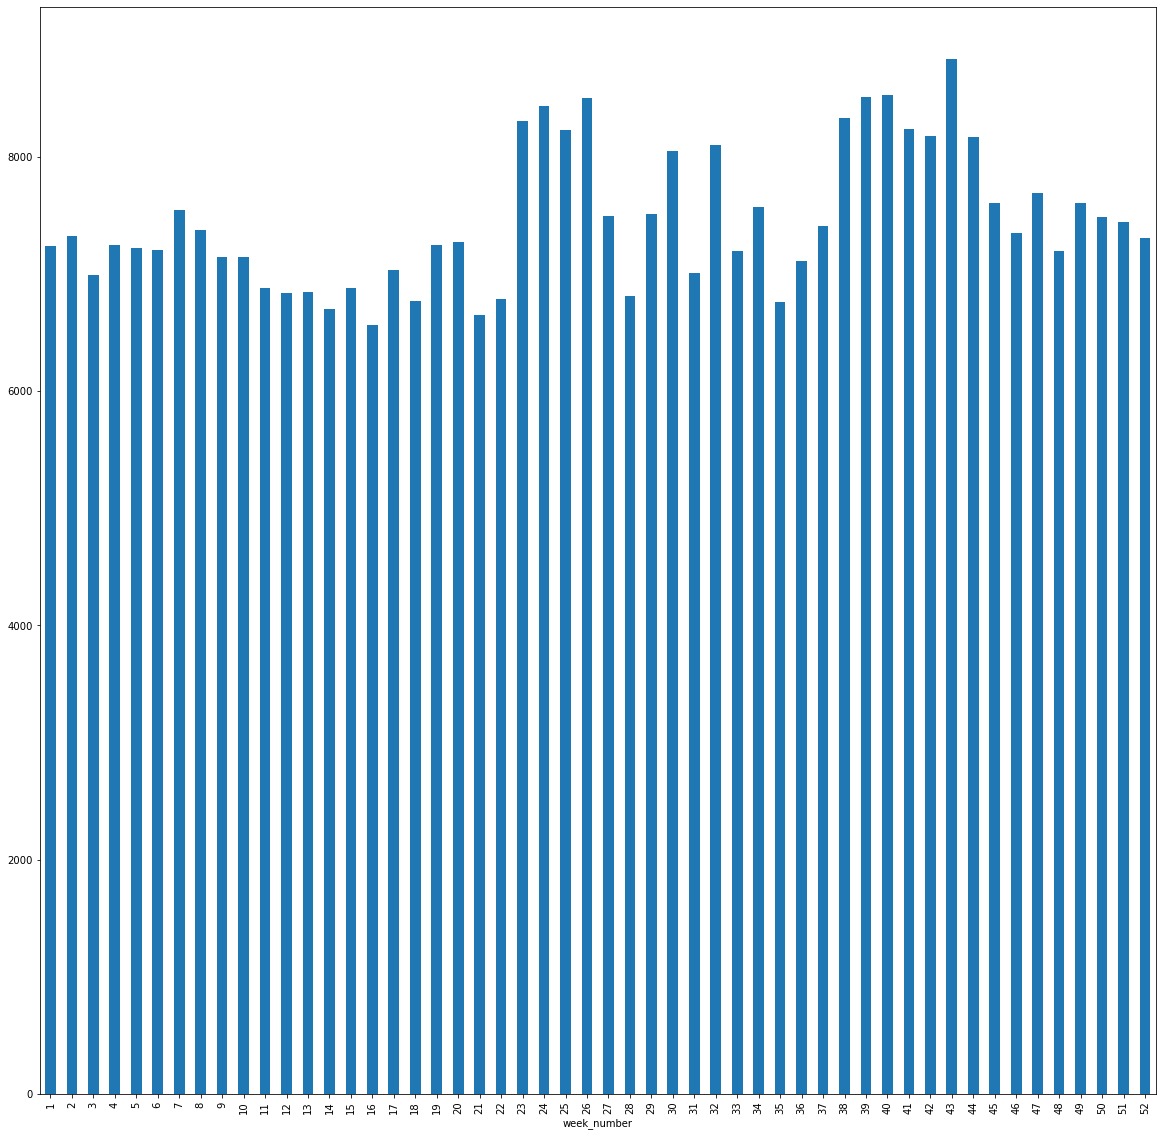

In [92]:
d14.groupby('week_number')['searchvolume'].mean().plot.bar(figsize=(20,20))

<AxesSubplot:xlabel='week_number'>

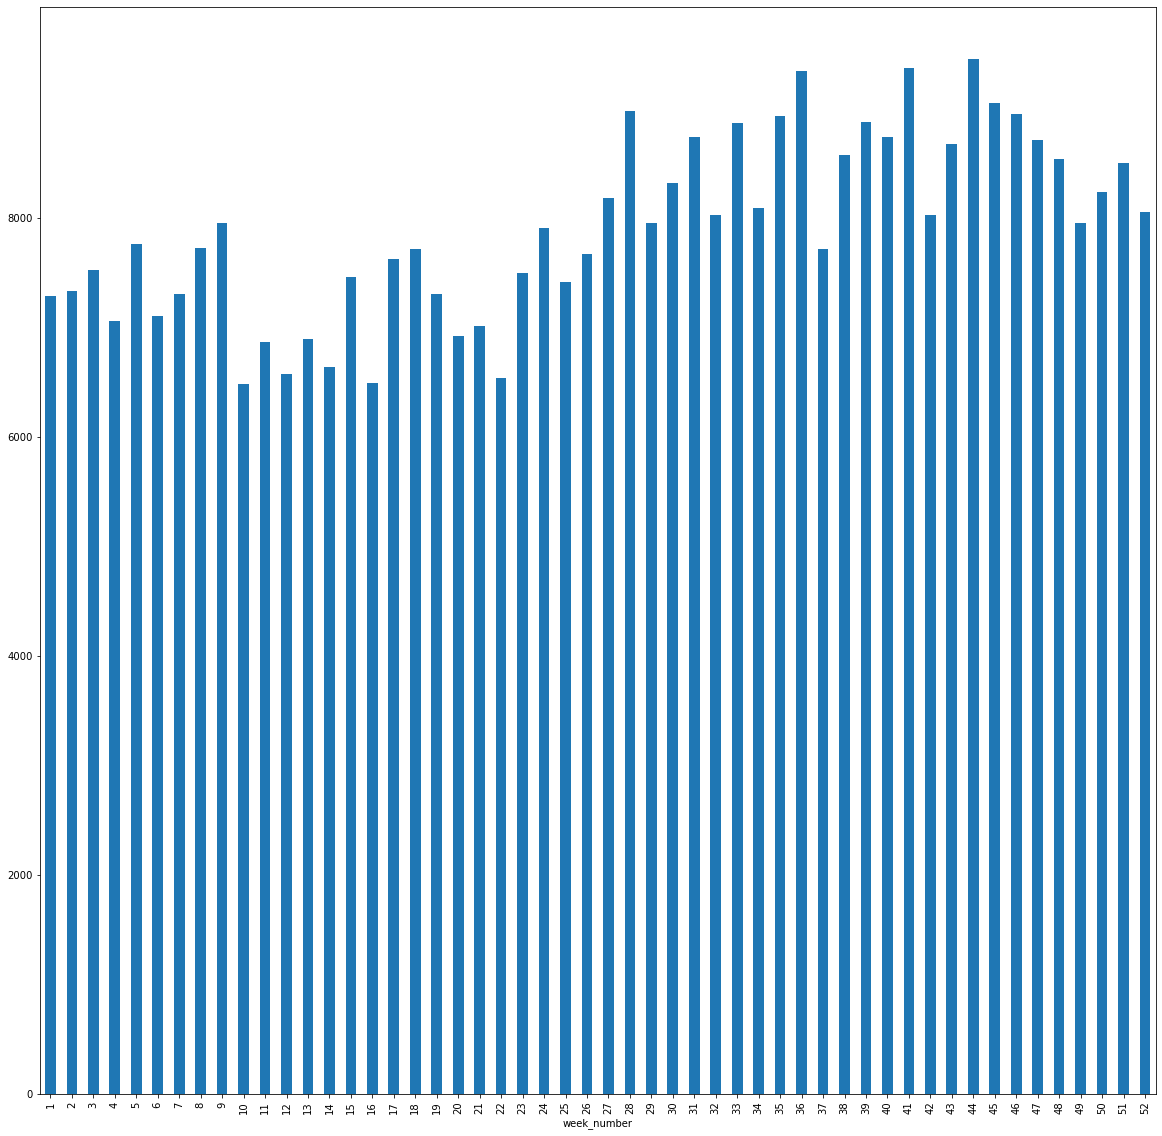

In [93]:
d15.groupby('week_number')['searchvolume'].mean().plot.bar(figsize=(20,20))

<AxesSubplot:xlabel='week_number'>

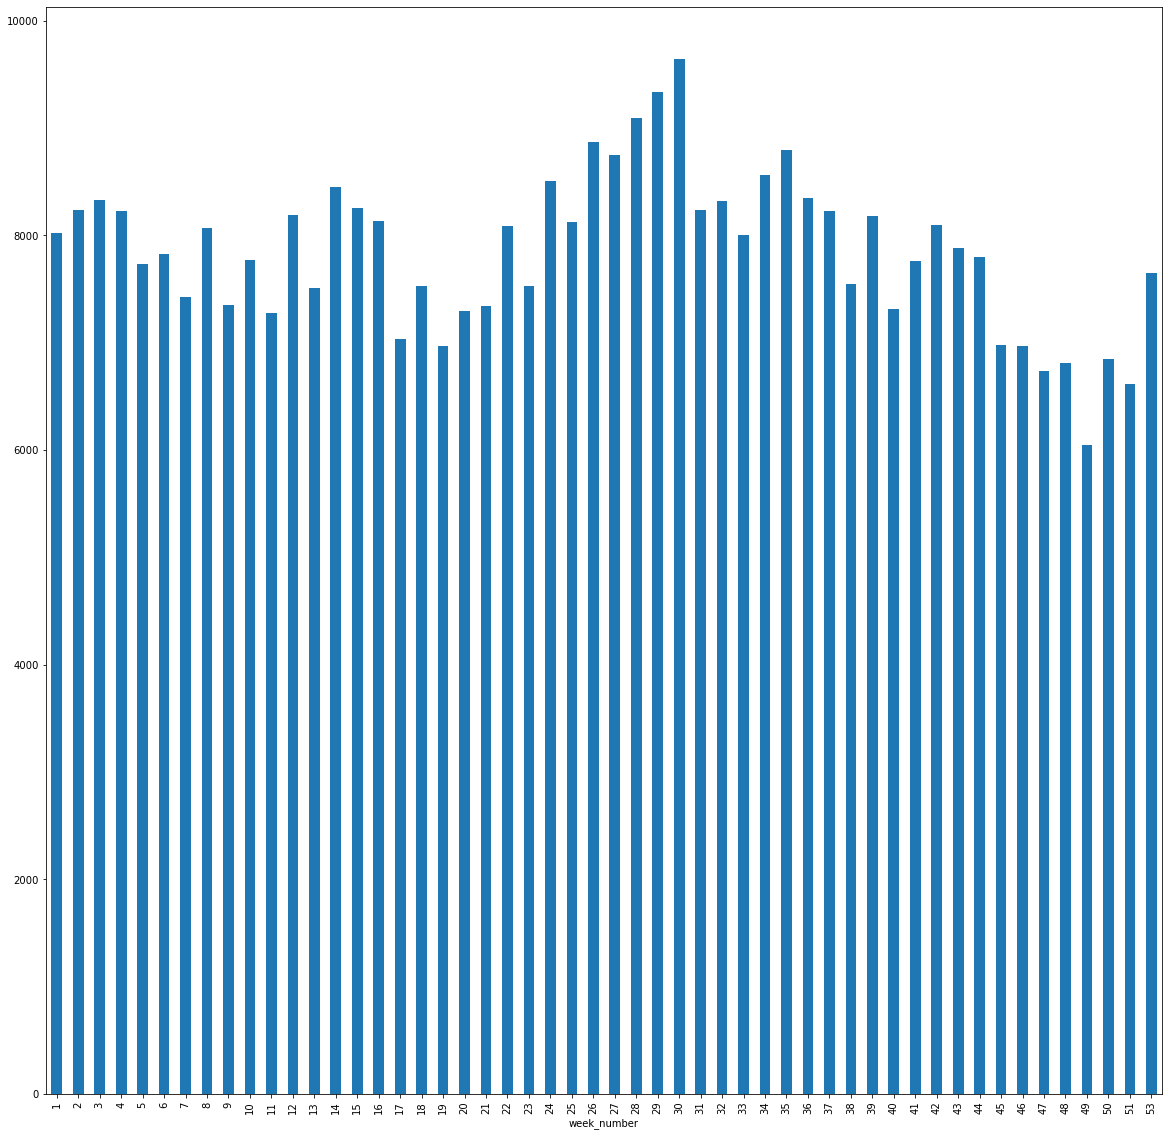

In [94]:
d16.groupby('week_number')['searchvolume'].mean().plot.bar(figsize=(20,20))

<AxesSubplot:xlabel='week_number'>

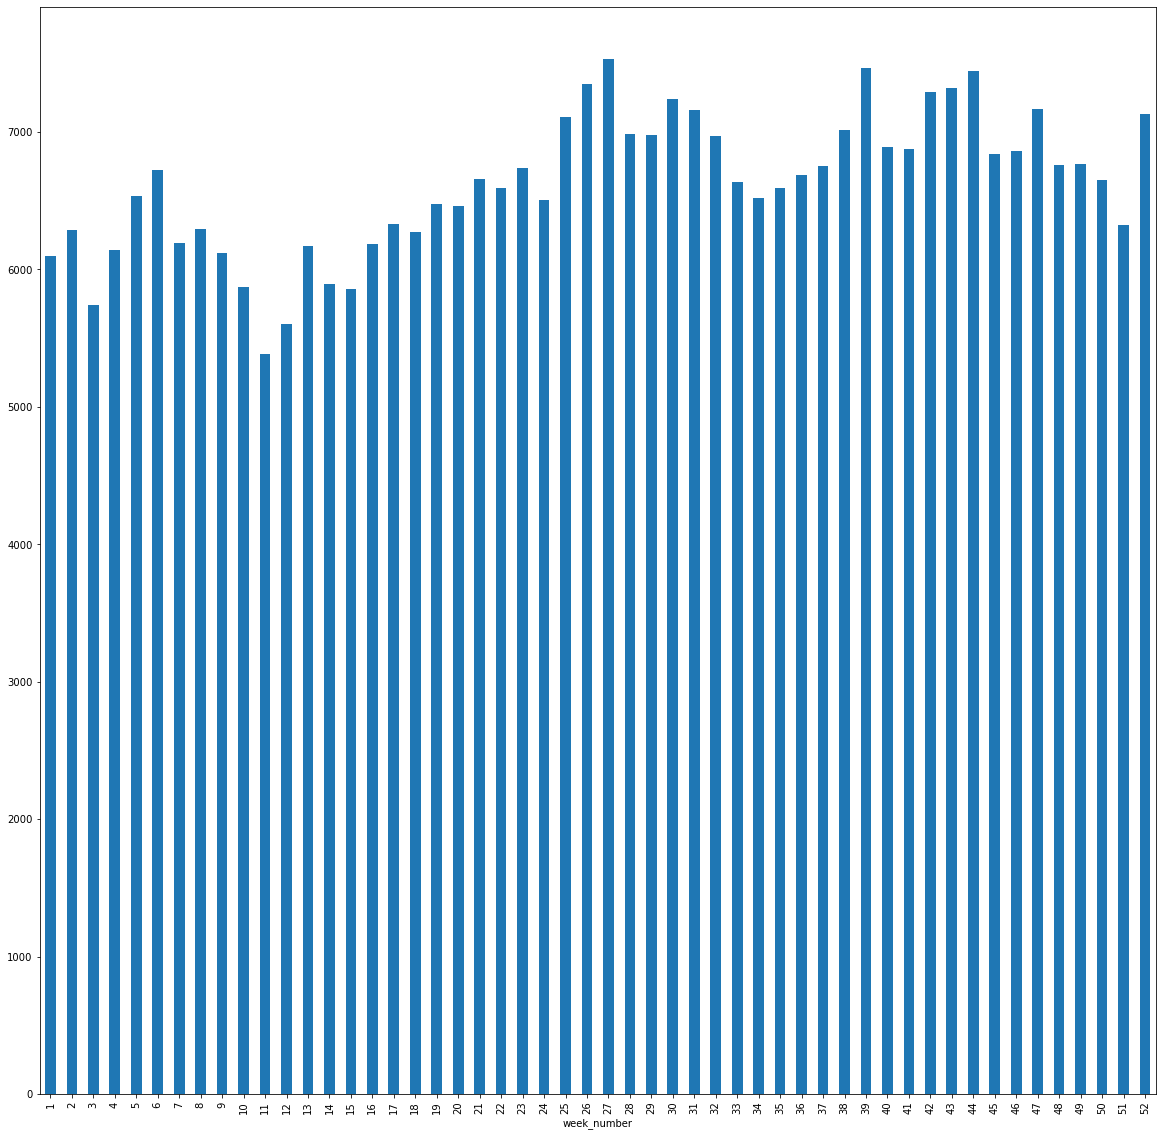

In [95]:
d17.groupby('week_number')['searchvolume'].mean().plot.bar(figsize=(20,20))

<AxesSubplot:xlabel='week_number'>

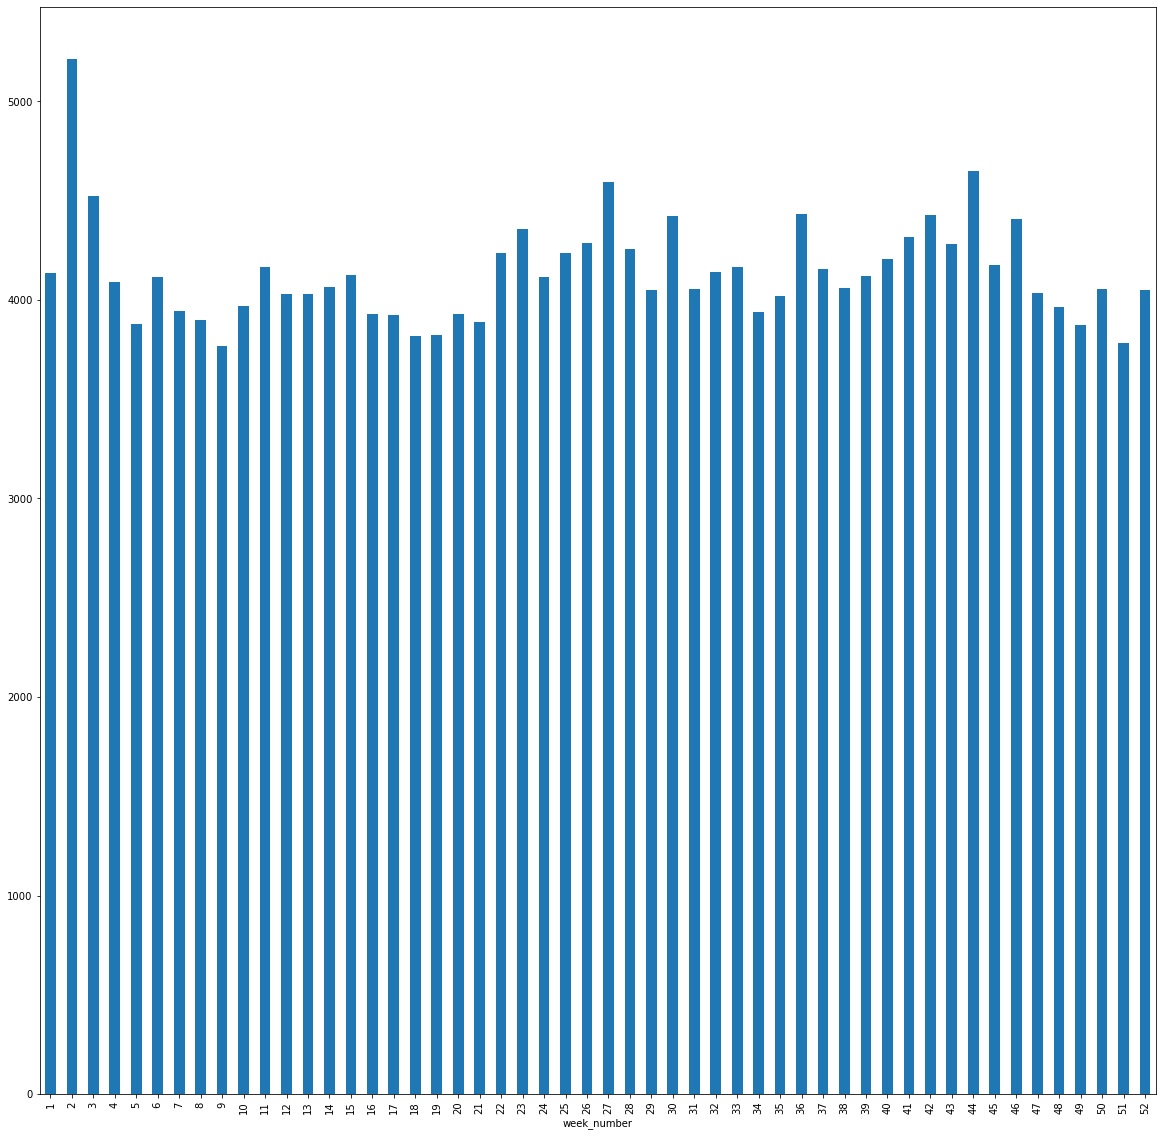

In [96]:
d18.groupby('week_number')['searchvolume'].mean().plot.bar(figsize=(20,20))

<AxesSubplot:xlabel='week_number'>

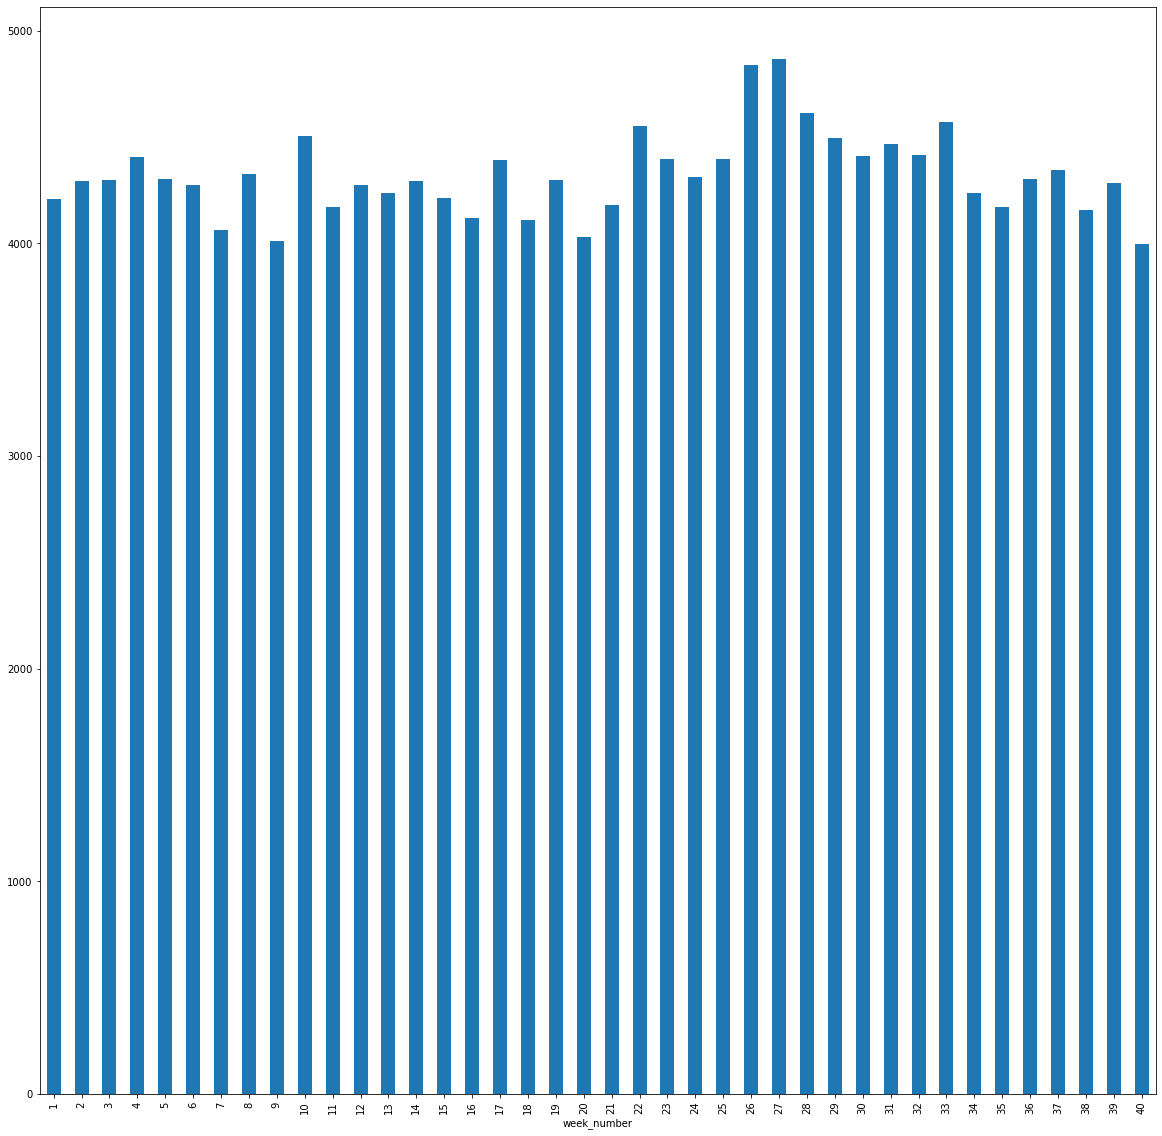

In [97]:
d19.groupby('week_number')['searchvolume'].mean().plot.bar(figsize=(20,20))

# Data exploration and Hypothesis Validation

# Merge the required data sources

In [98]:
df11=pd.merge(df1,df6,left_on='claim_id',right_on='claim_id',how='outer')

In [99]:
df11

,date,platform,searchvolume,claim_id,week_number,year_new,product_id
0,05-01-2014,google,349.0,916,1.0,2014.0,NaN
1,06-01-2014,google,349.0,916,2.0,2014.0,NaN
2,07-01-2014,google,697.0,916,2.0,2014.0,NaN
3,10-01-2014,google,349.0,916,2.0,2014.0,NaN
4,20-01-2014,google,697.0,916,4.0,2014.0,NaN
...,...,...,...,...,...,...,...
101052440,NaN,NaN,NaN,0,NaN,NaN,8158.0
101052441,NaN,NaN,NaN,0,NaN,NaN,45183.0
101052442,NaN,NaN,NaN,0,NaN,NaN,25690.0
101052443,NaN,NaN,NaN,0,NaN,NaN,46085.0


<AxesSubplot:xlabel='platform'>

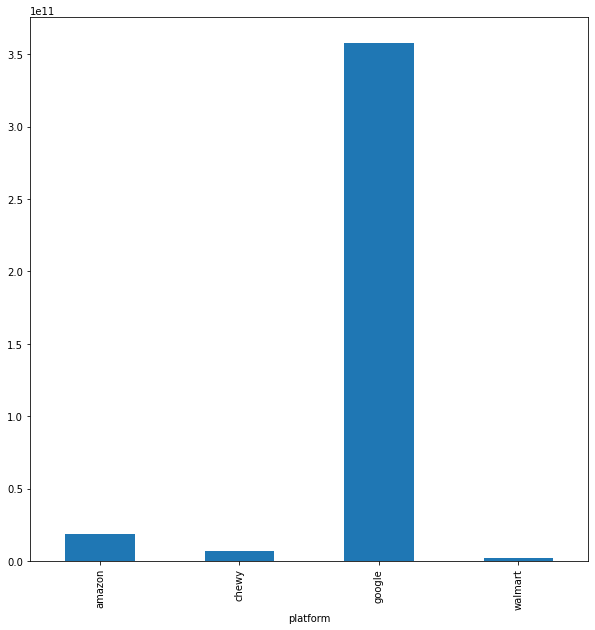

In [100]:
df11.groupby('platform')['searchvolume'].sum().plot.bar(figsize = (10,10))

In [101]:
df11.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 101052445 entries, 0 to 101052444
Data columns (total 7 columns):
 #   Column        Dtype  
---  ------        -----  
 0   date          object 
 1   platform      object 
 2   searchvolume  float64
 3   claim_id      int64  
 4   week_number   float64
 5   year_new      float64
 6   product_id    float64
dtypes: float64(4), int64(1), object(2)
memory usage: 6.0+ GB


In [102]:
dict1 = dict(zip(df3['product_id'],df3['sales_dollars_value']))

In [103]:
dict1

{1: 4579.0,
 3: 4638.0,
 4: 15.0,
 6: 14108.0,
 7: 33879.0,
 8: 98247.0,
 9: 368551.0,
 11: 9578.0,
 12: 28214.0,
 14: 17483.0,
 15: 13000.0,
 16: 48416.0,
 17: 104835.0,
 18: 125156.0,
 19: 39473.0,
 20: 241.0,
 21: 20.0,
 23: 12962.0,
 33: 134.0,
 34: 46.0,
 35: 201.0,
 36: 72.0,
 37: 69.0,
 65: 625.0,
 75: 13.0,
 90: 355.0,
 116: 3.0,
 337: 436.0,
 338: 30.0,
 342: 124.0,
 343: 17.0,
 345: 1031.0,
 346: 10691.0,
 347: 13150.0,
 348: 12851.0,
 349: 184.0,
 350: 19.0,
 352: 2198.0,
 353: 5913.0,
 354: 8952.0,
 355: 7043.0,
 356: 8552.0,
 357: 3.0,
 358: 82.0,
 362: 17.0,
 364: 4398.0,
 368: 9.0,
 369: 2711.0,
 370: 1.0,
 371: 13.0,
 372: 7.0,
 379: 1.0,
 386: 1133.0,
 387: 555.0,
 388: 2024.0,
 389: 7.0,
 390: 2.0,
 391: 1.0,
 392: 6870.0,
 393: 5.0,
 395: 9.0,
 396: 24.0,
 405: 4.0,
 414: 15.0,
 415: 14.0,
 418: 0.0,
 419: 68529.0,
 420: 52820.0,
 422: 17.0,
 423: 17.0,
 424: 2.0,
 429: 634.0,
 437: 8.0,
 448: 3.0,
 449: 15.0,
 450: 6.0,
 451: 7.0,
 483: 1209.0,
 587: 115386.0,
 589:

In [104]:
df11['sales_dollars_value'] = df11['product_id'].map(dict1)

In [105]:
df11

,date,platform,searchvolume,claim_id,week_number,year_new,product_id,sales_dollars_value
0,05-01-2014,google,349.0,916,1.0,2014.0,NaN,NaN
1,06-01-2014,google,349.0,916,2.0,2014.0,NaN,NaN
2,07-01-2014,google,697.0,916,2.0,2014.0,NaN,NaN
3,10-01-2014,google,349.0,916,2.0,2014.0,NaN,NaN
4,20-01-2014,google,697.0,916,4.0,2014.0,NaN,NaN
...,...,...,...,...,...,...,...,...
101052440,NaN,NaN,NaN,0,NaN,NaN,8158.0,NaN
101052441,NaN,NaN,NaN,0,NaN,NaN,45183.0,0.0
101052442,NaN,NaN,NaN,0,NaN,NaN,25690.0,NaN
101052443,NaN,NaN,NaN,0,NaN,NaN,46085.0,4.0


In [106]:
dict2 = dict(zip(df3['product_id'],df3['sales_units_value']))

In [107]:
dict2

{1: 313,
 3: 689,
 4: 1,
 6: 1102,
 7: 4095,
 8: 8093,
 9: 21693,
 11: 929,
 12: 1568,
 14: 906,
 15: 673,
 16: 2726,
 17: 3415,
 18: 7335,
 19: 2364,
 20: 85,
 21: 1,
 23: 813,
 33: 18,
 34: 9,
 35: 27,
 36: 9,
 37: 9,
 65: 78,
 75: 4,
 90: 43,
 116: 3,
 337: 69,
 338: 1,
 342: 6,
 343: 3,
 345: 80,
 346: 736,
 347: 881,
 348: 690,
 349: 9,
 350: 3,
 352: 108,
 353: 270,
 354: 420,
 355: 293,
 356: 295,
 357: 2,
 358: 9,
 362: 1,
 364: 73,
 368: 1,
 369: 108,
 370: 1,
 371: 1,
 372: 1,
 379: 2,
 386: 78,
 387: 37,
 388: 76,
 389: 1,
 390: 1,
 391: 1,
 392: 459,
 393: 1,
 395: 1,
 396: 2,
 405: 1,
 414: 1,
 415: 3,
 418: 1,
 419: 7845,
 420: 6044,
 422: 2,
 423: 1,
 424: 1,
 429: 48,
 437: 1,
 448: 1,
 449: 1,
 450: 2,
 451: 1,
 483: 95,
 587: 28728,
 589: 418,
 602: 88286,
 608: 35321,
 611: 4,
 613: 14,
 620: 139,
 621: 143,
 623: 5592,
 624: 1,
 11322: 725,
 11323: 396,
 11324: 713,
 11325: 293,
 11326: 1208,
 11327: 1252,
 11328: 1660,
 11329: 1295,
 11330: 566,
 11331: 1526,
 1133

In [108]:
df11['sales_units_value'] = df11['product_id'].map(dict2)

In [109]:
df11

,date,platform,searchvolume,claim_id,week_number,year_new,product_id,sales_dollars_value,sales_units_value
0,05-01-2014,google,349.0,916,1.0,2014.0,NaN,NaN,NaN
1,06-01-2014,google,349.0,916,2.0,2014.0,NaN,NaN,NaN
2,07-01-2014,google,697.0,916,2.0,2014.0,NaN,NaN,NaN
3,10-01-2014,google,349.0,916,2.0,2014.0,NaN,NaN,NaN
4,20-01-2014,google,697.0,916,4.0,2014.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
101052440,NaN,NaN,NaN,0,NaN,NaN,8158.0,NaN,NaN
101052441,NaN,NaN,NaN,0,NaN,NaN,45183.0,0.0,1.0
101052442,NaN,NaN,NaN,0,NaN,NaN,25690.0,NaN,NaN
101052443,NaN,NaN,NaN,0,NaN,NaN,46085.0,4.0,1.0


In [110]:
doc = dict(zip(df2['product_id'],df2['vendor']))

In [111]:
df11['vendor'] = df11['product_id'].map(doc)

In [112]:
df11

,date,platform,searchvolume,claim_id,week_number,year_new,product_id,sales_dollars_value,sales_units_value,vendor
0,05-01-2014,google,349.0,916,1.0,2014.0,NaN,NaN,NaN,NaN
1,06-01-2014,google,349.0,916,2.0,2014.0,NaN,NaN,NaN,NaN
2,07-01-2014,google,697.0,916,2.0,2014.0,NaN,NaN,NaN,NaN
3,10-01-2014,google,349.0,916,2.0,2014.0,NaN,NaN,NaN,NaN
4,20-01-2014,google,697.0,916,4.0,2014.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
101052440,NaN,NaN,NaN,0,NaN,NaN,8158.0,NaN,NaN,B
101052441,NaN,NaN,NaN,0,NaN,NaN,45183.0,0.0,1.0,Private Label
101052442,NaN,NaN,NaN,0,NaN,NaN,25690.0,NaN,NaN,B
101052443,NaN,NaN,NaN,0,NaN,NaN,46085.0,4.0,1.0,Private Label


# Overall market share of our client

<AxesSubplot:ylabel='market share'>

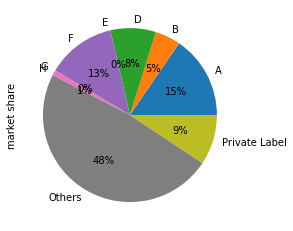

In [113]:
df11.groupby('vendor')['sales_dollars_value'].sum().plot(kind ='pie',y='value_column',autopct='%1.0f%%',label = 'market share')

In [114]:
maxs=df11.groupby('vendor')['sales_dollars_value'].sum()

In [115]:
final_ =maxs.reset_index()

In [116]:
final_

,vendor,sales_dollars_value
0,A,1.025462e+11
1,B,3.147224e+10
2,D,5.602992e+10
3,E,1.047016e+07
4,F,8.511764e+10
5,G,1.023603e+07
6,H,6.781075e+09
7,Others,3.207034e+11
8,Private Label,6.179395e+10


In [117]:
mapper1 = dict(zip(final_['vendor'],final_['sales_dollars_value']))

# The potential competitors for our client in each theme

In [118]:
dict3 = dict(zip(df5['claim_id'],df5['claim name']))

In [119]:
df11['claim name'] = df11['claim_id'].map(dict3)

In [120]:
potential1 = df11[df11['claim name']=='ethical - packaging']

In [121]:
potential1['aggregate sales'] = potential1['vendor'].map(mapper1)

C:\Users\ATUL~1.GUP\AppData\Local\Temp/ipykernel_13204/1564711922.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  potential1['aggregate sales'] = potential1['vendor'].map(mapper1)


In [122]:
potential1

,date,platform,searchvolume,claim_id,week_number,year_new,product_id,sales_dollars_value,sales_units_value,vendor,claim name,aggregate sales
76263507,03-01-2014,google,2.0,163,1.0,2014.0,23672.0,27.0,39.0,Others,ethical - packaging,3.207034e+11
76263508,03-01-2014,google,2.0,163,1.0,2014.0,23673.0,2.0,1.0,Others,ethical - packaging,3.207034e+11
76263509,03-01-2014,google,2.0,163,1.0,2014.0,25578.0,88514.0,1541.0,B,ethical - packaging,3.147224e+10
76263510,03-01-2014,google,2.0,163,1.0,2014.0,25584.0,55340.0,972.0,B,ethical - packaging,3.147224e+10
76263511,03-01-2014,google,2.0,163,1.0,2014.0,25743.0,35.0,4.0,B,ethical - packaging,3.147224e+10
...,...,...,...,...,...,...,...,...,...,...,...,...
76359577,13-09-2019,google,2.0,163,37.0,2019.0,39338.0,2.0,1.0,F,ethical - packaging,8.511764e+10
76359578,13-09-2019,google,2.0,163,37.0,2019.0,39382.0,241.0,68.0,F,ethical - packaging,8.511764e+10
76359579,13-09-2019,google,2.0,163,37.0,2019.0,36265.0,NaN,NaN,Others,ethical - packaging,3.207034e+11
76359580,13-09-2019,google,2.0,163,37.0,2019.0,40727.0,1359.0,215.0,Others,ethical - packaging,3.207034e+11


<AxesSubplot:ylabel='ethical-packaging'>

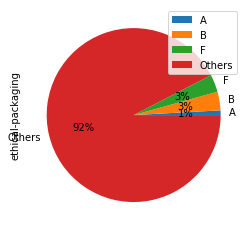

In [123]:
potential1.groupby('vendor')['aggregate sales'].sum().plot(kind ='pie',y='value_column',autopct='%1.0f%%',label = 'ethical-packaging',legend = True)

In [124]:
potential2 = df11[df11['claim name']== 'gingerbread']

In [125]:
potential2

,date,platform,searchvolume,claim_id,week_number,year_new,product_id,sales_dollars_value,sales_units_value,vendor,claim name
100999719,31-01-2019,amazon,39.0,433,5.0,2019.0,305.0,NaN,NaN,Others,gingerbread
100999720,31-01-2019,amazon,39.0,433,5.0,2019.0,849.0,8.0,836.0,Others,gingerbread
100999721,31-01-2019,amazon,39.0,433,5.0,2019.0,12090.0,1484.0,96.0,A,gingerbread
100999722,31-01-2019,amazon,39.0,433,5.0,2019.0,12455.0,210.0,20.0,Others,gingerbread
100999723,31-01-2019,amazon,39.0,433,5.0,2019.0,12514.0,1483.0,54.0,F,gingerbread
...,...,...,...,...,...,...,...,...,...,...,...
101000286,29-06-2019,google,41.0,433,26.0,2019.0,18931.0,964.0,38.0,F,gingerbread
101000287,29-06-2019,google,41.0,433,26.0,2019.0,18932.0,213.0,9.0,F,gingerbread
101000288,29-06-2019,google,41.0,433,26.0,2019.0,26054.0,12564.0,359.0,B,gingerbread
101000289,29-06-2019,google,41.0,433,26.0,2019.0,26059.0,26.0,1.0,B,gingerbread


In [126]:
potential2['aggregate sales'] = potential2['vendor'].map(mapper1)

C:\Users\ATUL~1.GUP\AppData\Local\Temp/ipykernel_13204/727305822.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  potential2['aggregate sales'] = potential2['vendor'].map(mapper1)


<AxesSubplot:ylabel='gingerbread'>

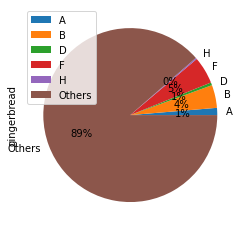

In [127]:
potential2.groupby('vendor')['aggregate sales'].sum().plot(kind ='pie',y='value_column',autopct='%1.0f%%',label='gingerbread',legend = True)

In [128]:
potential3 = df11[df11['claim name']=='american gumbo']

In [129]:
potential3

,date,platform,searchvolume,claim_id,week_number,year_new,product_id,sales_dollars_value,sales_units_value,vendor,claim name
101023113,NaN,NaN,NaN,147,NaN,NaN,1488.0,98.0,24.0,A,american gumbo
101023114,NaN,NaN,NaN,147,NaN,NaN,1647.0,18.0,2.0,Others,american gumbo
101023115,NaN,NaN,NaN,147,NaN,NaN,15142.0,NaN,NaN,Others,american gumbo
101023116,NaN,NaN,NaN,147,NaN,NaN,15153.0,1.0,1.0,Others,american gumbo
101023117,NaN,NaN,NaN,147,NaN,NaN,19178.0,NaN,NaN,Others,american gumbo
...,...,...,...,...,...,...,...,...,...,...,...
101023247,NaN,NaN,NaN,147,NaN,NaN,35196.0,20.0,2.0,Others,american gumbo
101023248,NaN,NaN,NaN,147,NaN,NaN,36273.0,NaN,NaN,Others,american gumbo
101023249,NaN,NaN,NaN,147,NaN,NaN,40309.0,21658.0,3500.0,Others,american gumbo
101023250,NaN,NaN,NaN,147,NaN,NaN,52306.0,0.0,1.0,Private Label,american gumbo


In [130]:
potential3['aggregate sales'] = potential3['vendor'].map(mapper1)

C:\Users\ATUL~1.GUP\AppData\Local\Temp/ipykernel_13204/2036823006.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  potential3['aggregate sales'] = potential3['vendor'].map(mapper1)


In [131]:
potential3

,date,platform,searchvolume,claim_id,week_number,year_new,product_id,sales_dollars_value,sales_units_value,vendor,claim name,aggregate sales
101023113,NaN,NaN,NaN,147,NaN,NaN,1488.0,98.0,24.0,A,american gumbo,1.025462e+11
101023114,NaN,NaN,NaN,147,NaN,NaN,1647.0,18.0,2.0,Others,american gumbo,3.207034e+11
101023115,NaN,NaN,NaN,147,NaN,NaN,15142.0,NaN,NaN,Others,american gumbo,3.207034e+11
101023116,NaN,NaN,NaN,147,NaN,NaN,15153.0,1.0,1.0,Others,american gumbo,3.207034e+11
101023117,NaN,NaN,NaN,147,NaN,NaN,19178.0,NaN,NaN,Others,american gumbo,3.207034e+11
...,...,...,...,...,...,...,...,...,...,...,...,...
101023247,NaN,NaN,NaN,147,NaN,NaN,35196.0,20.0,2.0,Others,american gumbo,3.207034e+11
101023248,NaN,NaN,NaN,147,NaN,NaN,36273.0,NaN,NaN,Others,american gumbo,3.207034e+11
101023249,NaN,NaN,NaN,147,NaN,NaN,40309.0,21658.0,3500.0,Others,american gumbo,3.207034e+11
101023250,NaN,NaN,NaN,147,NaN,NaN,52306.0,0.0,1.0,Private Label,american gumbo,6.179395e+10


<AxesSubplot:ylabel='american gumbo'>

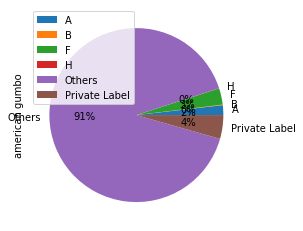

In [132]:
potential3.groupby('vendor')['aggregate sales'].sum().plot(kind ='pie',y='value_column',autopct='%1.0f%%',label='american gumbo',legend = True)

In [133]:
potential4 = df11[df11['claim name']=='low carb']

In [134]:
potential4

,date,platform,searchvolume,claim_id,week_number,year_new,product_id,sales_dollars_value,sales_units_value,vendor,claim name
372,01-01-2014,google,6613.0,8,1.0,2014.0,26.0,17.0,1.0,Others,low carb
373,01-01-2014,google,6613.0,8,1.0,2014.0,29.0,2.0,1.0,Others,low carb
374,01-01-2014,google,6613.0,8,1.0,2014.0,86.0,NaN,NaN,Others,low carb
375,01-01-2014,google,6613.0,8,1.0,2014.0,87.0,NaN,NaN,Others,low carb
376,01-01-2014,google,6613.0,8,1.0,2014.0,120.0,2.0,1.0,Others,low carb
...,...,...,...,...,...,...,...,...,...,...,...
73986097,30-09-2019,walmart,42.0,8,40.0,2019.0,56140.0,NaN,NaN,Others,low carb
73986098,30-09-2019,walmart,42.0,8,40.0,2019.0,56164.0,5203.0,346.0,Others,low carb
73986099,30-09-2019,walmart,42.0,8,40.0,2019.0,56182.0,NaN,NaN,Others,low carb
73986100,30-09-2019,walmart,42.0,8,40.0,2019.0,56183.0,NaN,NaN,Others,low carb


In [135]:
potential4['aggregate sales'] = potential4['vendor'].map(mapper1)

C:\Users\ATUL~1.GUP\AppData\Local\Temp/ipykernel_13204/3252587983.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  potential4['aggregate sales'] = potential4['vendor'].map(mapper1)


<AxesSubplot:ylabel='low carb'>

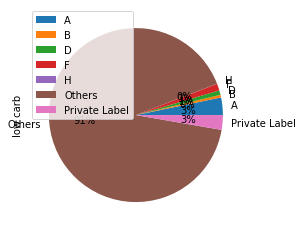

In [136]:
potential4.groupby('vendor')['aggregate sales'].sum().plot(kind ='pie',y='value_column',autopct='%1.0f%%',label='low carb',legend = True)

# What are the themes which are emerging in social media, Google Search & Sales?

In [137]:
df11

,date,platform,searchvolume,claim_id,week_number,year_new,product_id,sales_dollars_value,sales_units_value,vendor,claim name
0,05-01-2014,google,349.0,916,1.0,2014.0,NaN,NaN,NaN,NaN,gluten free
1,06-01-2014,google,349.0,916,2.0,2014.0,NaN,NaN,NaN,NaN,gluten free
2,07-01-2014,google,697.0,916,2.0,2014.0,NaN,NaN,NaN,NaN,gluten free
3,10-01-2014,google,349.0,916,2.0,2014.0,NaN,NaN,NaN,NaN,gluten free
4,20-01-2014,google,697.0,916,4.0,2014.0,NaN,NaN,NaN,NaN,gluten free
...,...,...,...,...,...,...,...,...,...,...,...
101052440,NaN,NaN,NaN,0,NaN,NaN,8158.0,NaN,NaN,B,No Claim
101052441,NaN,NaN,NaN,0,NaN,NaN,45183.0,0.0,1.0,Private Label,No Claim
101052442,NaN,NaN,NaN,0,NaN,NaN,25690.0,NaN,NaN,B,No Claim
101052443,NaN,NaN,NaN,0,NaN,NaN,46085.0,4.0,1.0,Private Label,No Claim


In [138]:
df11 = df11[df11['platform']=='google']

In [139]:
maxs = df11.groupby(['platform','claim name'])['claim name'].count()
final = maxs.sort_values(ascending = False)
final

platform  claim name          
google    low carb                39175500
          blueberry                4997719
          gmo free                 3738912
          ethnic & exotic          3166800
          chicken                  1940910
                                    ...   
          herring                        4
          butter                         3
          cashew nut                     2
          carob                          2
          white cheddar cheese           1
Name: claim name, Length: 159, dtype: int64

<AxesSubplot:ylabel='claim name'>

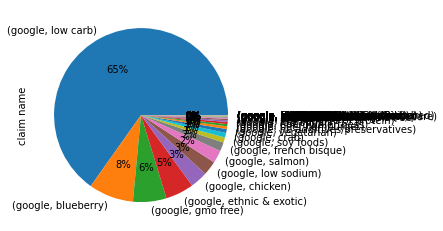

In [140]:
final.plot(kind='pie',y='value_column',autopct='%1.0f%%')

In [141]:
df3

,system_calendar_key_n,product_id,sales_dollars_value,sales_units_value,sales_lbs_value
0,20160109,1,13927.0,934,18680
1,20160109,3,10289.0,1592,28646
2,20160109,4,357.0,22,440
3,20160109,6,23113.0,2027,81088
4,20160109,7,23177.0,3231,58164
...,...,...,...,...,...
4526177,20181027,47536,8.0,2,3
4526178,20181027,47539,391.0,39,68
4526179,20181027,47543,105.0,59,48
4526180,20181027,47544,3720.0,1246,4361


<AxesSubplot:ylabel='sales_dollars_value'>

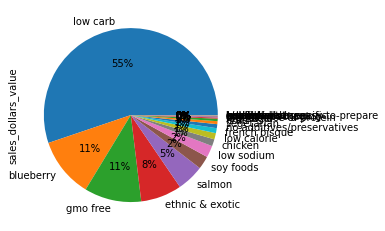

In [142]:
maxs1 = df11.groupby(['claim name'])['sales_dollars_value'].sum()
final1 = maxs1.sort_values(ascending = False)
final1.plot(kind='pie',y='value_column',autopct='%1.0f%%')

In [143]:
maxs2 = df11.groupby(['claim name'])['sales_units_value'].sum()
final2 = maxs2.sort_values(ascending = False)
final2.reset_index()

,claim name,sales_units_value
0,low carb,3.291656e+10
1,gmo free,4.255509e+09
2,salmon,2.191366e+09
3,soy foods,1.880151e+09
4,blueberry,1.767175e+09
...,...,...
154,ethical,0.000000e+00
155,egg,0.000000e+00
156,economy,0.000000e+00
157,duck,0.000000e+00


# The various hypothesis testing is done to check market trends and calculate the latency in dataset where different test on sales unit value,average are conducted.

# Validate the hypothesis

# Hypothesis Test 1

In [144]:
# Ho : searchvolumeavg = 5000
# Ha : searchvoumeavg != 5000

In [145]:
value =  df1['searchvolume']

In [146]:
x_bar = np.mean(value)
s =  np.std(value,ddof = 1)
n = len(value)
searchvolumeavg = 5000

In [147]:
# t_stat = (x_bar-searchvolumeavg)/(s/np.sqrt(n))
# print(t_stat)
# pval = stats.t.cdf(t_stat,df=n-1)*2
# print(pval)

In [148]:
stats.ttest_1samp(value,popmean=5000)

Ttest_1sampResult(statistic=31.182158202985356, pvalue=6.822859489304367e-213)

In [149]:
# pval = 0.11
# sig lvl = 0.05
# pval < sig lvl
# Ho is accepeted i.e Ha is accepted
# The avg search volume is not equal 5000.

# Hypothesis Test 2

In [150]:
x_1 = df1[df1['platform'] == 'google']
y_1 = df1[df1['platform'] == 'walmart']
z = df1[df1['platform'] == 'chewy']
w = df1[df1['platform'] ==  'amazon']

In [151]:
sample_x_1 = x_1['searchvolume']
sample_y_1 = y_1['searchvolume']
sample_z = z['searchvolume']
sample_w = w['searchvolume']


In [152]:
# Ho : Search Volume are same on all platform
# Ha : Atleast Search Volume on one platform is different

In [153]:
stats.f_oneway(sample_x_1,sample_y_1,sample_z,sample_w)

F_onewayResult(statistic=4919.49624658084, pvalue=0.0)

In [154]:
# pval = 0.0
# sig lvl = 0.05
# pval < sig lvl
# Ho is rejected i.e Ha is accepted
# Atleast Search Volume on one platform is different

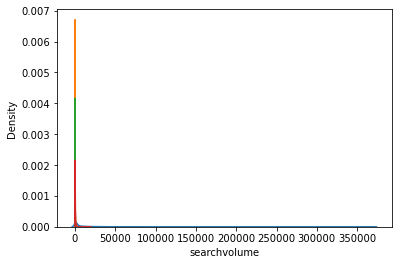

In [155]:
sns.kdeplot(sample_x_1)
sns.kdeplot(sample_y_1)
sns.kdeplot(sample_z)
sns.kdeplot(sample_w)
plt.show()

# Hypohtesis Test 3

In [156]:
dict4 = dict(zip(df3['product_id'],df3['sales_units_value']))

In [157]:
dict5 = dict(zip(df6['claim_id'],df6['product_id']))

In [158]:
df1['product_id'] = df1['claim_id'].map(dict5)

In [159]:
df1['sales_units_value'] = df1['product_id'].map(dict4)

In [160]:
df1.dropna(inplace = True)

In [161]:
df1

,date,platform,searchvolume,claim_id,week_number,year_new,product_id,sales_units_value
497,01-01-2014,google,181,39,1,2014,28317.0,9.0
498,02-01-2014,google,91,39,1,2014,28317.0,9.0
499,08-01-2014,google,91,39,2,2014,28317.0,9.0
500,09-01-2014,google,451,39,2,2014,28317.0,9.0
501,11-01-2014,google,91,39,2,2014,28317.0,9.0
...,...,...,...,...,...,...,...,...
181505,18-08-2019,walmart,42,75,33,2019,40467.0,824.0
181506,31-08-2019,walmart,42,75,35,2019,40467.0,824.0
181507,08-09-2019,walmart,167,75,36,2019,40467.0,824.0
181508,28-09-2019,walmart,42,75,39,2019,40467.0,824.0


In [162]:
x1 = df1[df1['platform'] == 'google']
y1 = df1[df1['platform'] == 'walmart']
z1 = df1[df1['platform'] == 'chewy']
w1 = df1[df1['platform'] ==  'amazon']

In [163]:
sample_x1 = x1['sales_units_value']
sample_y1 = y1['sales_units_value']
sample_z1 = z1['sales_units_value']
sample_w1 = w1['sales_units_value']


In [164]:
# Ho : Sales Unit Value are same on all platform
# Ha : Atleast Sales Unit Value on one platform is different

In [165]:
stats.f_oneway(sample_x1,sample_y1,sample_z1,sample_w1)

F_onewayResult(statistic=13.606452135067958, pvalue=7.308040997703673e-09)

In [166]:
# pval = 7.308040997703673e-09
# sig lvl = 0.05
# pval < sig lvl
# Ho is rejected i.e Ha is accepted
#  Atleast Sales Unit Value on one platform is different

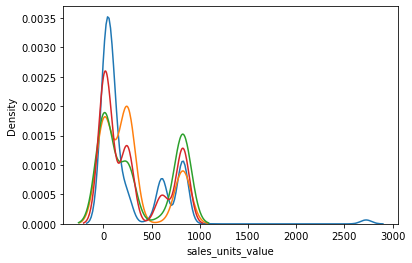

In [167]:
sns.kdeplot(sample_x1)
sns.kdeplot(sample_y1)
sns.kdeplot(sample_z1)
sns.kdeplot(sample_w1)
plt.show()

In [168]:
# The latency observed is demonstarted by plotting date variation with respect to serachvolume,sales_dollars_value,
# sales_unit_value and total post


# Is the latency significantly different across themes?

In [169]:
# Yes the latency is different across different themes

# The model build up phase deals with different aspect of sales model and key factor invloved for sales driver we implemented differentmodel and check r2 score for best model and leverage factor for sales drive.

# Build the sales model and identify the driver of sales 

# 	Create a dependent variable by aggregating sales of our client to corresponding theme level

In [170]:
maxs= df11.groupby('claim name')['sales_dollars_value'].sum().reset_index().rename(columns={'sales_dollars_value':'valuesum','claim name' : 'theme_name'})

# Building a Predictive sales model

In [130]:
#df80 = df3[['product_id','sales_units_value','sales_lbs_value','sales_dollars_value']]

In [131]:
#df80.isnull().sum()

product_id             0
sales_units_value      0
sales_lbs_value        0
sales_dollars_value    0
dtype: int64

In [132]:
#df1

,date,platform,searchvolume,claim_id,week_number,year_new
0,05-01-2014,google,349,916,1,2014
1,06-01-2014,google,349,916,2,2014
2,07-01-2014,google,697,916,2,2014
3,10-01-2014,google,349,916,2,2014
4,20-01-2014,google,697,916,4,2014
...,...,...,...,...,...,...
181560,05-09-2019,walmart,125,980,36,2019
181561,22-09-2019,walmart,84,980,38,2019
181562,26-09-2019,walmart,42,980,39,2019
181563,15-07-2019,walmart,42,622,29,2019


In [133]:
#df4

,theme id,published_date,total_post,claim_id,product_id
104,148.0,06-10-2015,3,148,1492
134,148.0,07-10-2015,1,148,1492
929,148.0,01-01-2018,2,8,56190
958,148.0,01-08-2018,2,430,55122
962,148.0,10-11-2018,3,75,40467
...,...,...,...,...,...
533340,876.0,08-02-2019,1287,438,55832
533351,876.0,08-03-2019,945,8,56190
533355,876.0,08-05-2019,1306,75,40467
533359,876.0,08-09-2019,1694,75,40467


In [134]:
#df6

,product_id,claim_id
0,26,8
1,29,8
2,48,81
3,50,81
4,74,227
...,...,...
91480,8158,0
91481,45183,0
91482,25690,0
91483,46085,0


In [135]:
#map_1 = dict(zip(df1['date'],df1['claim_id']))

In [136]:
#map_1

{'05-01-2014': 689,
 '06-01-2014': 536,
 '07-01-2014': 536,
 '10-01-2014': 536,
 '20-01-2014': 536,
 '30-01-2014': 536,
 '31-01-2014': 536,
 '04-02-2014': 536,
 '09-02-2014': 536,
 '12-02-2014': 536,
 '13-02-2014': 536,
 '16-02-2014': 536,
 '16-03-2014': 536,
 '25-03-2014': 536,
 '26-03-2014': 536,
 '02-04-2014': 536,
 '03-04-2014': 536,
 '04-04-2014': 536,
 '17-04-2014': 536,
 '18-04-2014': 536,
 '20-04-2014': 816,
 '22-04-2014': 536,
 '23-04-2014': 536,
 '24-04-2014': 536,
 '30-04-2014': 536,
 '01-05-2014': 536,
 '02-05-2014': 536,
 '04-05-2014': 536,
 '13-05-2014': 536,
 '23-05-2014': 536,
 '24-05-2014': 536,
 '23-06-2014': 536,
 '24-06-2014': 148,
 '30-06-2014': 536,
 '01-07-2014': 536,
 '08-07-2014': 536,
 '31-07-2014': 536,
 '01-08-2014': 536,
 '03-08-2014': 536,
 '07-08-2014': 689,
 '08-08-2014': 536,
 '09-08-2014': 536,
 '10-08-2014': 536,
 '27-08-2014': 536,
 '26-09-2014': 536,
 '30-09-2014': 536,
 '01-10-2014': 536,
 '03-10-2014': 536,
 '11-10-2014': 536,
 '12-10-2014': 536,


In [137]:
#df4['claim_id'] = df4['published_date'].map(map_1)

In [138]:
#df4.dropna(inplace = True)

In [139]:
#df4

,theme id,published_date,total_post,claim_id,product_id
104,148.0,06-10-2015,3,148,1492
134,148.0,07-10-2015,1,148,1492
929,148.0,01-01-2018,2,8,56190
958,148.0,01-08-2018,2,430,55122
962,148.0,10-11-2018,3,75,40467
...,...,...,...,...,...
533340,876.0,08-02-2019,1287,438,55832
533351,876.0,08-03-2019,945,8,56190
533355,876.0,08-05-2019,1306,75,40467
533359,876.0,08-09-2019,1694,75,40467


In [140]:
#df4['claim_id'] = df4['claim_id'].astype(int)

In [141]:
#df4

,theme id,published_date,total_post,claim_id,product_id
104,148.0,06-10-2015,3,148,1492
134,148.0,07-10-2015,1,148,1492
929,148.0,01-01-2018,2,8,56190
958,148.0,01-08-2018,2,430,55122
962,148.0,10-11-2018,3,75,40467
...,...,...,...,...,...
533340,876.0,08-02-2019,1287,438,55832
533351,876.0,08-03-2019,945,8,56190
533355,876.0,08-05-2019,1306,75,40467
533359,876.0,08-09-2019,1694,75,40467


In [142]:
#map_2 = dict(zip(df6['claim_id'],df6['product_id']))

In [143]:
#map_2

{8: 56190,
 81: 56135,
 227: 55760,
 432: 55873,
 186: 56073,
 58: 55897,
 185: 55409,
 222: 55629,
 32: 41365,
 220: 36889,
 438: 55832,
 193: 28228,
 187: 56188,
 224: 56185,
 40: 56149,
 125: 40321,
 437: 29090,
 158: 55182,
 430: 55122,
 145: 55335,
 151: 54526,
 433: 26420,
 65: 18405,
 39: 28317,
 16: 29089,
 75: 40467,
 287: 22198,
 228: 18738,
 152: 33211,
 73: 41103,
 120: 56160,
 385: 23261,
 100: 19656,
 15: 40211,
 207: 29134,
 163: 40728,
 192: 27873,
 142: 18758,
 171: 32014,
 147: 55941,
 148: 1492,
 384: 17499,
 101: 10815,
 178: 28365,
 59: 5804,
 393: 17925,
 38: 17779,
 191: 56648,
 157: 8419,
 0: 34907,
 211: 28114}

In [144]:
#df4['product_id'] = df4['claim_id'].map(map_2)

In [145]:
#df4.dropna(inplace = True)

In [146]:
#df4['product_id'] = df4['product_id'].astype(int)

In [147]:
#df4

,theme id,published_date,total_post,claim_id,product_id
104,148.0,06-10-2015,3,148,1492
134,148.0,07-10-2015,1,148,1492
929,148.0,01-01-2018,2,8,56190
958,148.0,01-08-2018,2,430,55122
962,148.0,10-11-2018,3,75,40467
...,...,...,...,...,...
533340,876.0,08-02-2019,1287,438,55832
533351,876.0,08-03-2019,945,8,56190
533355,876.0,08-05-2019,1306,75,40467
533359,876.0,08-09-2019,1694,75,40467


In [148]:
#map_3 = dict(zip(df4['product_id'],df4['total_post']))

In [149]:
#df80['total_post'] = df80['product_id'].map(map_3)

In [150]:
#df80.dropna(inplace = True)

In [151]:
#df80

,product_id,sales_units_value,sales_lbs_value,sales_dollars_value,total_post
1386470,1492,24,15,98.0,534.0
1491891,1492,24,15,110.0,534.0
1539562,1492,24,15,1.0,534.0
2352144,40467,20,25,173.0,1694.0
2404538,40467,31,39,265.0,1694.0
...,...,...,...,...,...
4503048,55760,586,483,633.0,999.0
4515866,40467,782,977,7507.0,1694.0
4519510,40467,824,1030,8028.0,1694.0
4522259,55760,607,501,656.0,999.0


In [20]:
df10 = pd.merge(df3,df6, on='product_id', how = 'inner')

In [21]:
df10

,system_calendar_key_n,product_id,sales_dollars_value,sales_units_value,sales_lbs_value,claim_id
0,20160109,1,13927.0,934,18680,0
1,20160123,1,12628.0,878,17564,0
2,20160206,1,11379.0,810,16200,0
3,20160130,1,11568.0,821,16424,0
4,20160213,1,10959.0,784,15682,0
...,...,...,...,...,...,...
7767415,20191005,56817,699.0,37,129,0
7767416,20191005,56818,486.0,7,158,0
7767417,20191005,56924,53.0,3,16,8
7767418,20191005,57045,6.0,1,7,0


In [22]:
dict1 = dict(zip(df1['claim_id'],df1['searchvolume']))

In [23]:
df10['searchvolume'] = df10['claim_id'].map(dict1)

In [24]:
dict11 = dict(zip(df4['published_date'],df4['total_post']))

In [25]:
df1['total_post'] = df1['date'].map(dict11)

In [26]:
dict12 = dict(zip(df1['claim_id'],df1['total_post']))

In [27]:
df10['total_post'] = df10['claim_id'].map(dict12)

In [28]:
df10

,system_calendar_key_n,product_id,sales_dollars_value,sales_units_value,sales_lbs_value,claim_id,searchvolume,total_post
0,20160109,1,13927.0,934,18680,0,NaN,NaN
1,20160123,1,12628.0,878,17564,0,NaN,NaN
2,20160206,1,11379.0,810,16200,0,NaN,NaN
3,20160130,1,11568.0,821,16424,0,NaN,NaN
4,20160213,1,10959.0,784,15682,0,NaN,NaN
...,...,...,...,...,...,...,...,...
7767415,20191005,56817,699.0,37,129,0,NaN,NaN
7767416,20191005,56818,486.0,7,158,0,NaN,NaN
7767417,20191005,56924,53.0,3,16,8,42.0,NaN
7767418,20191005,57045,6.0,1,7,0,NaN,NaN


In [29]:
df10.dropna(inplace = True)

In [30]:
df10

,system_calendar_key_n,product_id,sales_dollars_value,sales_units_value,sales_lbs_value,claim_id,searchvolume,total_post
3951,20160109,37,1101.0,159,105,158,41.0,702.0
3952,20160123,37,1101.0,159,105,158,41.0,702.0
3953,20160206,37,1101.0,159,105,158,41.0,702.0
3954,20160130,37,1001.0,145,95,158,41.0,702.0
3955,20160213,37,886.0,127,83,158,41.0,702.0
...,...,...,...,...,...,...,...,...
7767395,20191005,56034,6193.0,166,4312,40,82.0,1154.0
7767399,20191005,19804,54.0,9,4,40,82.0,1154.0
7767401,20191005,19810,54.0,9,4,40,82.0,1154.0
7767408,20191005,56032,232.0,18,82,40,82.0,1154.0


In [31]:
df80 = df10[['total_post','sales_units_value','sales_lbs_value','sales_dollars_value']]

In [32]:
df80

,total_post,sales_units_value,sales_lbs_value,sales_dollars_value
3951,702.0,159,105,1101.0
3952,702.0,159,105,1101.0
3953,702.0,159,105,1101.0
3954,702.0,145,95,1001.0
3955,702.0,127,83,886.0
...,...,...,...,...
7767395,1154.0,166,4312,6193.0
7767399,1154.0,9,4,54.0
7767401,1154.0,9,4,54.0
7767408,1154.0,18,82,232.0


# Mutiple Regression Model

In [33]:
X = df80.iloc[:, :-1].values
y = df80.iloc[:, -1].values

In [34]:
print(X)

[[ 702.  159.  105.]
 [ 702.  159.  105.]
 [ 702.  159.  105.]
 ...
 [1154.    9.    4.]
 [1154.   18.   82.]
 [1022.   27.  109.]]


In [35]:
print(y)

[1101. 1101. 1101. ...   54.  232.  295.]


In [36]:
print(X)

[[ 702.  159.  105.]
 [ 702.  159.  105.]
 [ 702.  159.  105.]
 ...
 [1154.    9.    4.]
 [1154.   18.   82.]
 [1022.   27.  109.]]


In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [38]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [39]:
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[  9984.41  17305.  ]
 [ 10310.85  13154.  ]
 [  8935.69  15162.  ]
 ...
 [101640.14 161714.  ]
 [ 36337.26  32075.  ]
 [ 11587.75   5659.  ]]


In [40]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8244326665845632

# Polynomial Regression

In [41]:
X = df80.iloc[:, :-1].values
y = df80.iloc[:, -1].values

In [42]:
print(X)

[[ 702.  159.  105.]
 [ 702.  159.  105.]
 [ 702.  159.  105.]
 ...
 [1154.    9.    4.]
 [1154.   18.   82.]
 [1022.   27.  109.]]


In [43]:
print(y)

[1101. 1101. 1101. ...   54.  232.  295.]


In [44]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [45]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
poly_reg = PolynomialFeatures(degree = 4)
X_poly = poly_reg.fit_transform(X_train)
regressor = LinearRegression()
regressor.fit(X_poly, y_train)

LinearRegression()

In [46]:
y_pred = regressor.predict(poly_reg.transform(X_test))
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[  9367.46  17305.  ]
 [  9237.52  13154.  ]
 [  7014.84  15162.  ]
 ...
 [135890.98 161714.  ]
 [ 47817.56  32075.  ]
 [  8523.51   5659.  ]]


In [47]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9036875587470885

# Decision Tree Regression

In [48]:
X = df80.iloc[:, :-1].values
y = df80.iloc[:, -1].values

In [49]:
print(X)

[[ 702.  159.  105.]
 [ 702.  159.  105.]
 [ 702.  159.  105.]
 ...
 [1154.    9.    4.]
 [1154.   18.   82.]
 [1022.   27.  109.]]


In [50]:
print(y)

[1101. 1101. 1101. ...   54.  232.  295.]


In [51]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [52]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

In [53]:
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[ 14650.   17305. ]
 [ 12693.   13154. ]
 [  8784.5  15162. ]
 ...
 [169852.  161714. ]
 [ 48005.   32075. ]
 [  5676.    5659. ]]


In [54]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.948260407313796

# Random Forest Regression

In [55]:
X = df80.iloc[:, :-1].values
y = df80.iloc[:, -1].values

In [56]:
print(X)

[[ 702.  159.  105.]
 [ 702.  159.  105.]
 [ 702.  159.  105.]
 ...
 [1154.    9.    4.]
 [1154.   18.   82.]
 [1022.   27.  109.]]


In [57]:
print(y)

[1101. 1101. 1101. ...   54.  232.  295.]


In [58]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [59]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10, random_state=0)

In [60]:
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[ 16498.7   17305.  ]
 [ 13028.    13154.  ]
 [  8774.85  15162.  ]
 ...
 [169852.   161714.  ]
 [ 34061.5   32075.  ]
 [  5770.71   5659.  ]]


In [61]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9624432447613948

# Identify the right  model technique and select the suitable variables

In [203]:
#r2_score for Random Forest Regression is best among all model hence Random Forest Model is best for model technique
# with r2_score of  0.9624432447613948